In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/heart-failure-clinical-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


**Reading the data and pre-proccesing**

In [2]:
df=pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

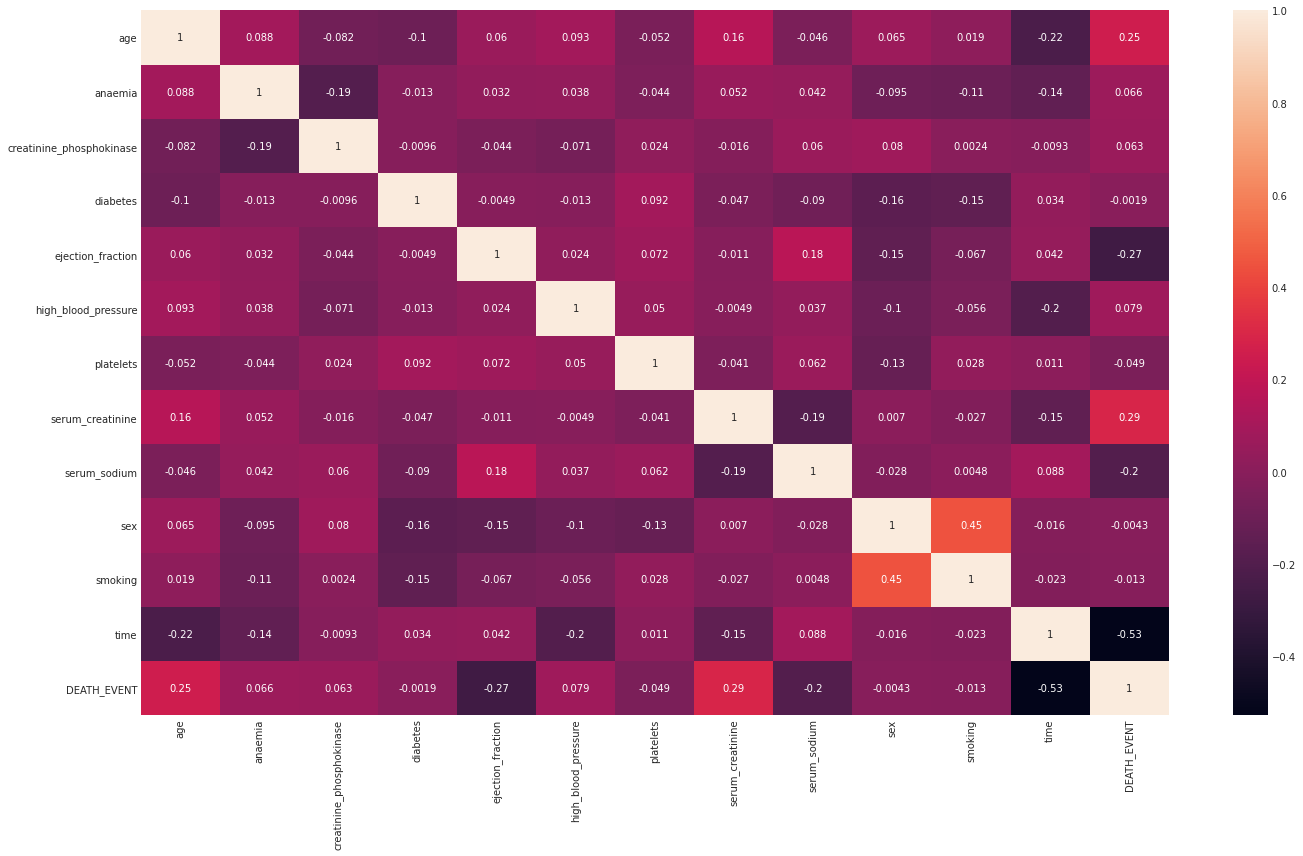

In [5]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(method='pearson'), annot=True)

**Setting up the train and validation sets**

In [6]:
#features = ['age', 'anemia','creatinine_phosphokinase','diabetes', 
#       'ejection_fraction','high_blood_pressure', 'platelets',
#               'serum_sodium','sex','smoking', 'time']

df_train=df.sample(frac=0.7, random_state=0)
df_valid =df.drop(df_train.index)

X_train = df_train.drop('DEATH_EVENT', axis=1)
X_valid = df_valid.drop('DEATH_EVENT', axis=1)

y_train = df_train['DEATH_EVENT']
y_valid = df_valid['DEATH_EVENT']

**Setting up the model**


In [7]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[12]),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),  
    layers.Dense(1, activation='sigmoid'),
])


**Choosing Optimizer ,Loss and Metric**

Epoch 1/200
11/11 [==============================] - 1s 53ms/step - loss: 0.7234 - binary_accuracy: 0.6273 - val_loss: 13.1043 - val_binary_accuracy: 0.3556
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6581 - binary_accuracy: 0.6633 - val_loss: 9.0262 - val_binary_accuracy: 0.3556
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 0.7045 - binary_accuracy: 0.6231 - val_loss: 6.6060 - val_binary_accuracy: 0.3556
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 0.7123 - binary_accuracy: 0.6064 - val_loss: 5.0886 - val_binary_accuracy: 0.3556
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 0.6548 - binary_accuracy: 0.6291 - val_loss: 4.0160 - val_binary_accuracy: 0.3556
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 0.5644 - binary_accuracy: 0.7189 - val_loss: 3.1848 - val_binary_accuracy: 0.3556
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - l

<AxesSubplot:title={'center':'Accuracy'}>

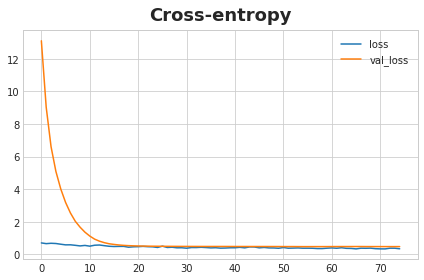

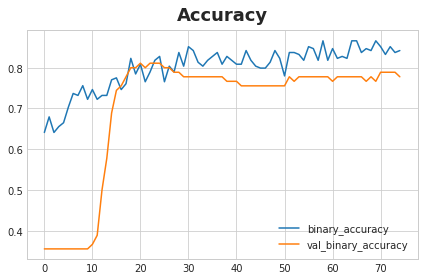

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=20,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [9]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max(),
              history_df['val_binary_accuracy'].mean()))

Best Validation Loss: 0.4715
Best Validation Accuracy: 0.8111
Best Validation Accuracy: 0.7027
